## Data Analysis of a E-Commerce website's Transaction details 
### By: Harish Rathnam

#### Data Set Information:

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.


#### Attribute Information:
**InvoiceNo:** Invoice number. Nominal, a 6-digit integral number uniquely assigned to each         transaction. If this code starts with letter 'c', it indicates a cancellation.  
       
**StockCode:** Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.         
       
**Description:** Product (item) name. Nominal.   
        
**Quantity:** The quantities of each product (item) per transaction. Numeric.    
        
**InvoiceDate:** Invoice Date and time. Numeric, the day and time when each transaction was generated.      
       
**UnitPrice:** Unit price. Numeric, Product price per unit in sterling.      
      
**CustomerID:** Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.      
        
**Country:** Country name. Nominal, the name of the country where each customer resides.      

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns

In [25]:
dat = pd.read_csv("../input/ecommerce-data/data.csv", encoding= 'unicode_escape')

pd.set_option('display.max_columns', 500)

dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Data Exploration & Data Cleaning

In [26]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [27]:
dat.head(15)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


Given the initial look of the data, We can see that the data is made up of various transactions with a seperate transaction for each Description. There are some changes that need to made with the data types of the CustomerID and InvoiceDate columns.
        
**InvoiceDate** should be *datetime64* rather than *object* Dtype        
**CustomerID** should be *object* type rather than *float64* Dtype

In [28]:
dat['InvoiceDate'] = pd.to_datetime(dat['InvoiceDate'])
dat.CustomerID = dat.CustomerID.astype(object)
dat.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


Now I want to see if there are any missing values in the dataset that may cause problems for our analysis

In [29]:
dat.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [30]:
dat.isnull().sum() / dat.shape[0] * 100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

We have almost 25% of the CustomerID column missing and less than 1% of the Description column missing. I will check to see if the rows with missing Description values are also missing CustomerID values to eliminate unnecessary work.

In [31]:
pd.set_option('display.max_rows', 1000)
null_data = dat[dat.isnull().any(axis=1)]
null_data.info()
null_data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135080 entries, 622 to 541540
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    135080 non-null  object        
 1   StockCode    135080 non-null  object        
 2   Description  133626 non-null  object        
 3   Quantity     135080 non-null  int64         
 4   InvoiceDate  135080 non-null  datetime64[ns]
 5   UnitPrice    135080 non-null  float64       
 6   CustomerID   0 non-null       object        
 7   Country      135080 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 9.3+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


It appears that all the missing values for the Description column are also missing CustomerID values so lets take a look at the rows where both values are missing

In [32]:
null_data = dat[dat['Description'].isnull()]
null_data.sample(15)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
87404,543654,22525,NaN,-57,2011-02-11 10:29:00,0.0,NaN,United Kingdom
130967,547536,90005A,NaN,1,2011-03-23 15:07:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
323241,565275,90209C,NaN,-72,2011-09-02 11:08:00,0.0,NaN,United Kingdom
85488,543473,21661,NaN,1,2011-02-08 15:01:00,0.0,NaN,United Kingdom
165036,550761,84388,NaN,6,2011-04-20 12:10:00,0.0,NaN,United Kingdom
162504,550502,84535A,NaN,320,2011-04-18 15:29:00,0.0,NaN,United Kingdom
147789,549134,20758,NaN,-54,2011-04-06 15:22:00,0.0,NaN,United Kingdom
173392,551700,85144,NaN,-38,2011-05-03 14:13:00,0.0,NaN,United Kingdom
341599,566766,21311,NaN,-117,2011-09-14 17:51:00,0.0,NaN,United Kingdom


It appears that where there is a missing Description and CustomerID the unitprice = 0 and the quantity is either positive or negative. We can infer that these transactions are likely returns from customers and the company has not developed a clear strategy of handling returned items. It would be wise for the company to develop some sort of way to identify returns or faulty transactions so they can be assessed more accurately. However, since there is no explanation for the occurances of these transactions it is best to drop all transactions with missing descriptions and with a unitprice=0. It would also be in our best interest to drop missing CustomerID's as they will not be of use for us if we are looking to make accurate insights for this data analysis.

In [33]:
dat = dat.dropna()
dat.isnull().sum()
dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


Next I would like to determine how many transaction cancellations we have. A cancelled transaction is indicated by a C at the beginning of the InvoiceNo.

In [34]:
dat["IsCancelled"]=np.where(dat.InvoiceNo.apply(lambda l: l[0]=="C"), True, False)
dat.IsCancelled.value_counts() / dat.shape[0] * 100

False    97.81112
True      2.18888
Name: IsCancelled, dtype: float64

In [35]:
dat.loc[dat.IsCancelled==True].describe()

,Quantity,UnitPrice
count,8905.000000,8905.000000
mean,-30.859966,18.845519
std,1170.154939,444.366043
min,-80995.000000,0.010000
25%,-6.000000,1.450000
50%,-2.000000,2.950000
75%,-1.000000,4.950000
max,-1.000000,38970.000000


Since we have negative quantities for all quartiles and positive unit prices, understanding the data without any further explanation or information will become too difficult for us to predict so it is best to drop the data from the dataset.

In [36]:
dat = dat.loc[dat.IsCancelled==False].copy()
dat = dat.drop("IsCancelled", axis=1)

### Stock Codes and Descriptions

In [37]:
dat.StockCode.nunique(), dat.Description.nunique()

(3665, 3877)

We have 3665 unique StockCodes and 3877 unique Descriptions which aligns with the fact that the retailer sells many different types of products. Lets take a look at the most common stockcodes and descriptions being sold 

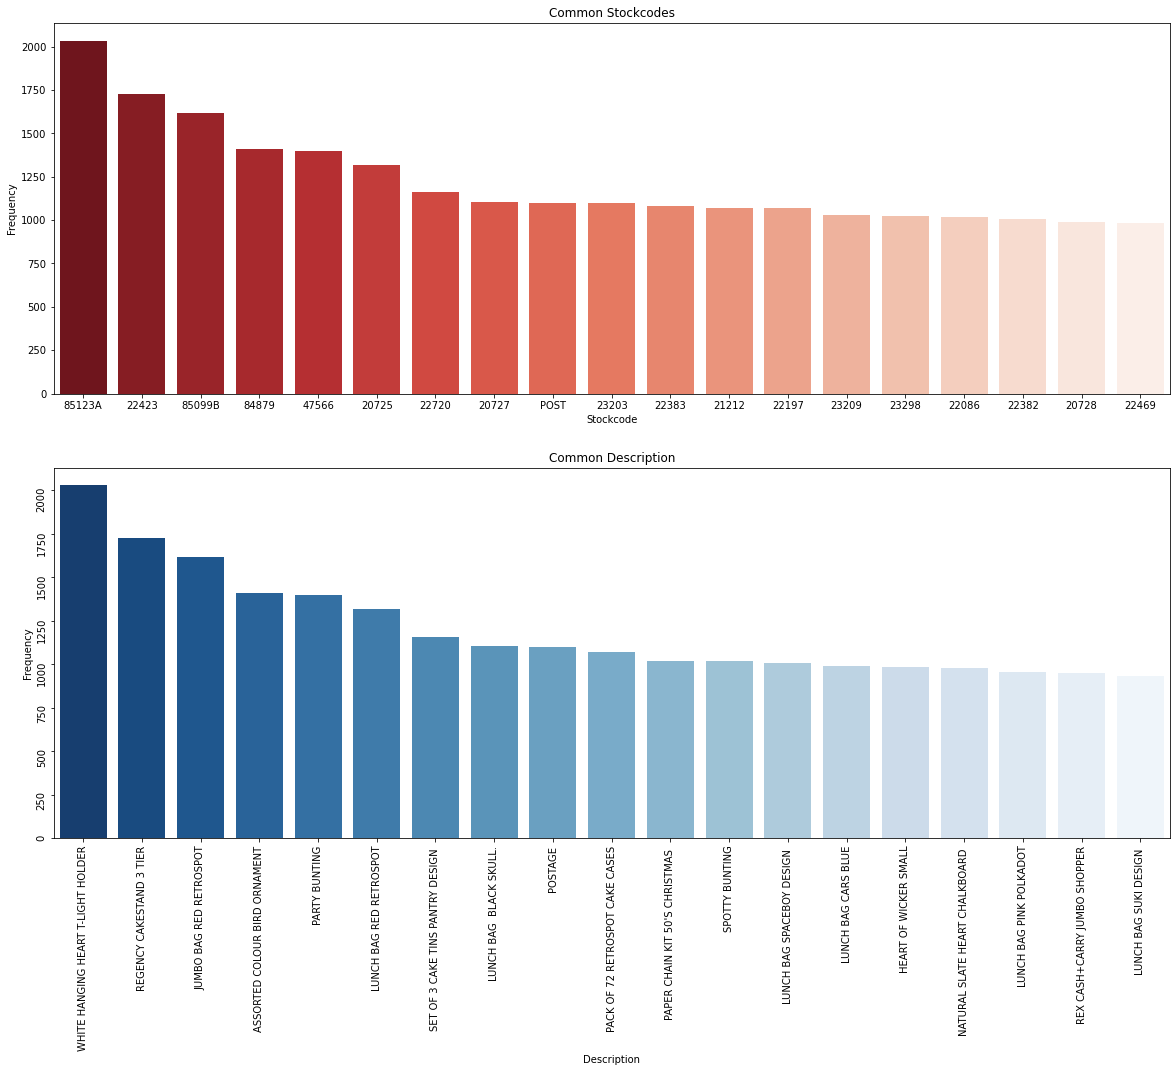

In [41]:
stockcode_frequency = dat.StockCode.value_counts().sort_values(ascending=False)
description_frequency = dat.Description.value_counts().sort_values(ascending=False)
fig, ax = plt.subplots(2,1,figsize=(20,15))
sns.barplot(stockcode_frequency.iloc[0:19].index,
            stockcode_frequency.iloc[0:19].values,
            ax = ax[0], palette="Reds_r")
ax[0].set_ylabel("Frequency")
ax[0].set_xlabel("Stockcode")
ax[0].set_title("Common Stockcodes");
sns.barplot(description_frequency.iloc[0:19].index,
            description_frequency.iloc[0:19].values,
            ax = ax[1], palette="Blues_r")
ax[1].set_ylabel("Frequency")
ax[1].set_xlabel("Description")
ax[1].tick_params(labelrotation=90)

ax[1].set_title("Common Description");

We can see that our top 20 most frequent stockcodes and descriptions generally match up with eachother in terms of level of frequency so we can say it is true that majority of the descriptions are consistent with the stockcodes except for some exceptions causing slight differences in the amount of stockcodes vs descriptions

### Customers and Countries 

Next I would like to see what customers and what countries had the most transactions and the correlation between our top customers and the countries 

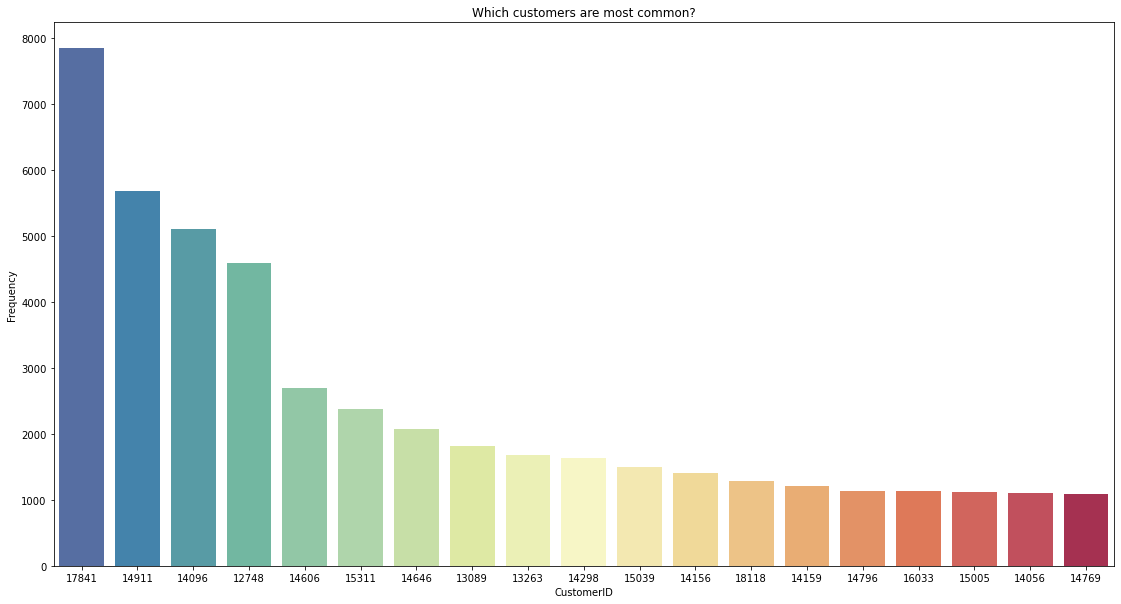

In [42]:
customer_frequency = dat.CustomerID.value_counts().sort_values(ascending=False).iloc[0:19] 
plt.figure(figsize=(19,10))
customer_frequency.index = customer_frequency.index.astype('Int64') 
sns.barplot(customer_frequency.index, customer_frequency.values, order=customer_frequency.index, palette="Spectral_r")
plt.ylabel("Frequency")
plt.xlabel("CustomerID")
plt.title("Which customers are most common?");

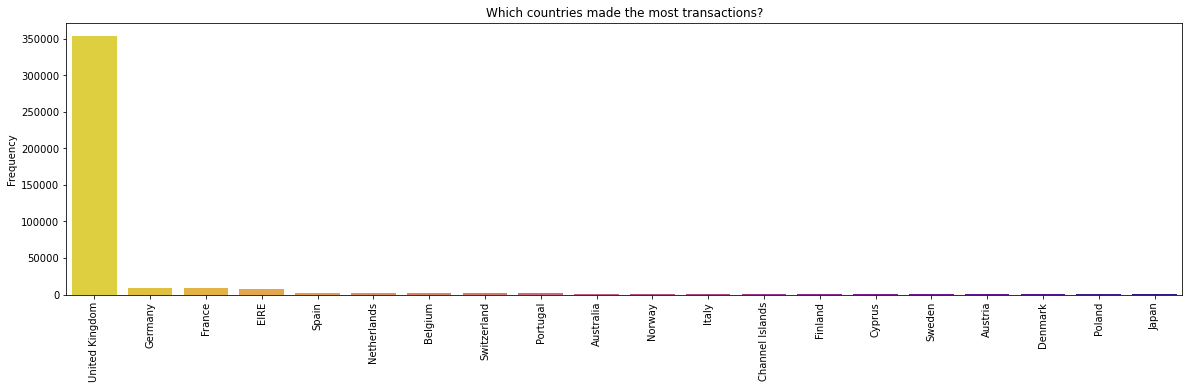

In [43]:
country_frequency = dat.Country.value_counts().sort_values(ascending=False).iloc[0:20]
plt.figure(figsize=(20,5))
sns.barplot(country_frequency.index, country_frequency.values, palette="plasma_r")
plt.ylabel("Frequency")
plt.title("Which countries made the most transactions?");
plt.xticks(rotation=90);

It is clear that the vast majority of transactions take place in the United Kingdom. Lets see if our top 20 Customers purchase their items in the United Kingdom or in other countries. 

In [44]:
x = dat.groupby(['CustomerID','Country']).size().sort_values(ascending=False).iloc[0:19]
pd.DataFrame(x)

,,0
CustomerID,Country,
17841.0,United Kingdom,7847
14911.0,EIRE,5677
14096.0,United Kingdom,5111
12748.0,United Kingdom,4596
14606.0,United Kingdom,2700
15311.0,United Kingdom,2379
14646.0,Netherlands,2080
13089.0,United Kingdom,1818
13263.0,United Kingdom,1677


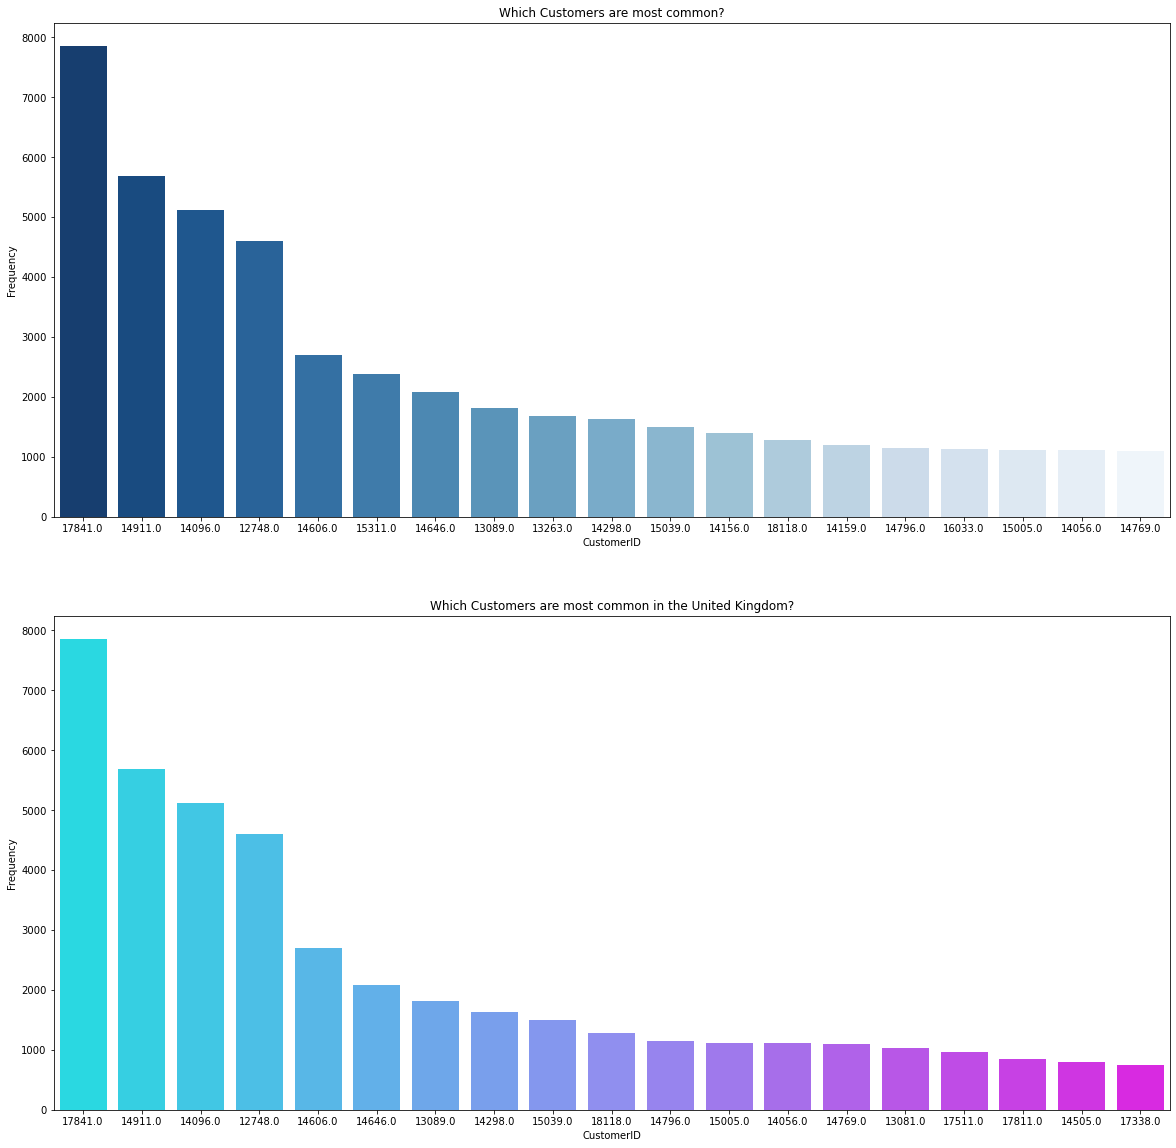

In [45]:
customer_frequency = dat.CustomerID.value_counts().sort_values(ascending=False).iloc[0:19] 
uk_customers = dat.groupby(dat['CustomerID']).size().where(dat['Country'] == 'United Kingdom').sort_values(ascending=False).iloc[0:19]
fig, ax = plt.subplots(2,1,figsize=(20,20))
sns.barplot(customer_frequency.index,
            customer_frequency.values,
            ax = ax[0], palette="Blues_r", order=customer_frequency.index)
ax[0].set_ylabel("Frequency")
ax[0].set_xlabel("CustomerID")
ax[0].set_title("Which Customers are most common?");
sns.barplot(uk_customers.index,
            uk_customers.values,
            ax = ax[1], palette="cool", order=uk_customers.index)
ax[1].set_ylabel("Frequency")
ax[1].set_xlabel("CustomerID")
ax[1].set_title("Which Customers are most common in the United Kingdom?");

It appears we have a few outliers in our top customers group where the top country is Ireland and the Netherlands.However, the majority are from the United Kingdom which makes sense due to the large difference in transactions between the United Kingdom and the rest of the countries in our dataset.

### Unit Price and Quantity 

Before I start doing any time-series analysis, I want to make sure my price and quantity features make sense and will be easy for us to analyze.

In [46]:
dat.UnitPrice.describe()

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

Before a graph the unit price, I want to make sure there are no 0 or less than 0 valued unit prices as this will become a problem when we are finding the log of the unitprice.

In [47]:
dat = dat.loc[dat.UnitPrice > 0].copy()

Now that there are no zero value unit prices we can graph the distribution

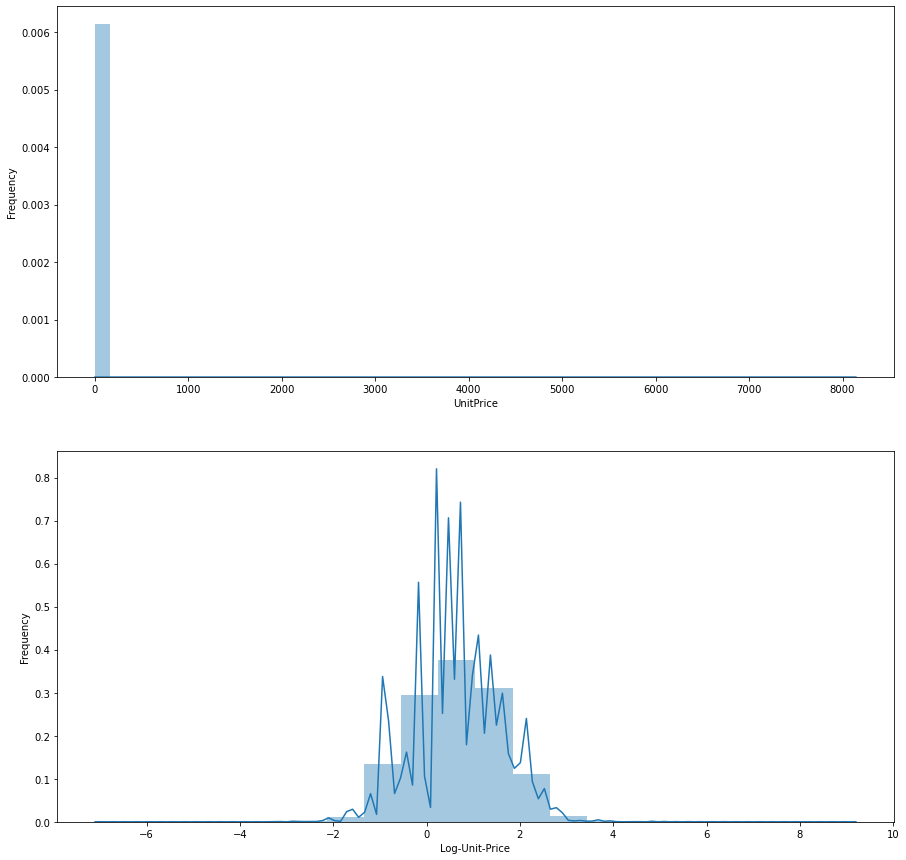

In [48]:
fig, ax = plt.subplots(2,1,figsize=(15,15))
sns.distplot(dat.UnitPrice, ax=ax[0])
ax[0].set_ylabel('Frequency')
sns.distplot(np.log(dat.UnitPrice), ax=ax[1], bins=20)
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel("Log-Unit-Price");

From the graphs we can see that a large portion of the prices are quite small and we have a few outliers that are very large. Due to the high frequency of small transactions I will focus on the transactions with prices in the log-unit-price graph. To find the prices i will take the exponent of -2 and the exponent of 3 as the majority of the price are between these two log units.

In [49]:
np.exp(-2),np.exp(3)

(0.1353352832366127, 20.085536923187668)

We can see that the majority of our distribution lies between 0.1 and 20.1 so I will delete all outliers outside of this range

In [50]:
dat = dat.loc[(dat.UnitPrice > 0.1) & (dat.UnitPrice < 20)].copy()

In [51]:
dat.UnitPrice.describe()

count    396462.000000
mean          2.809563
std           2.783123
min           0.120000
25%           1.250000
50%           1.950000
75%           3.750000
max          19.960000
Name: UnitPrice, dtype: float64

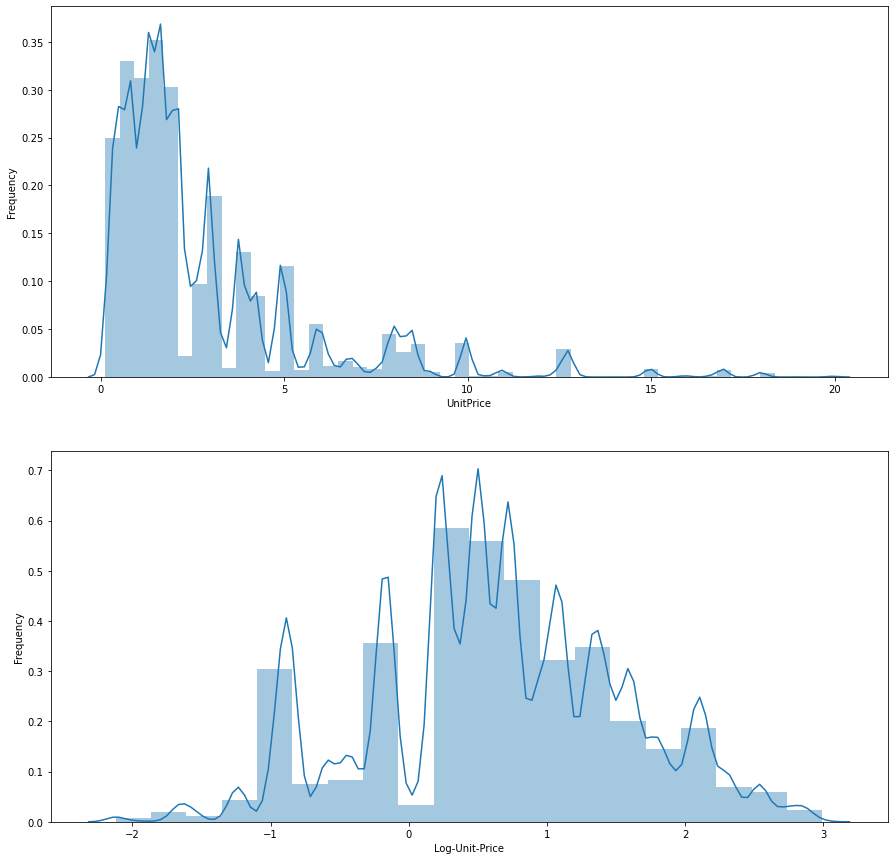

In [52]:
fig, ax = plt.subplots(2,1,figsize=(15,15))
sns.distplot(dat.UnitPrice, ax=ax[0])
ax[0].set_ylabel('Frequency')
sns.distplot(np.log(dat.UnitPrice), ax=ax[1], bins=20)
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel("Log-Unit-Price");

Now are std is much smaller and we have a more evenly distributed graph. Our graph is still skewed to the right which is something to make note of for which we will deal with later. Now lets take a look at the Quantity column.

In [53]:
dat.Quantity.describe()

count    396462.000000
mean         12.933943
std         179.461050
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

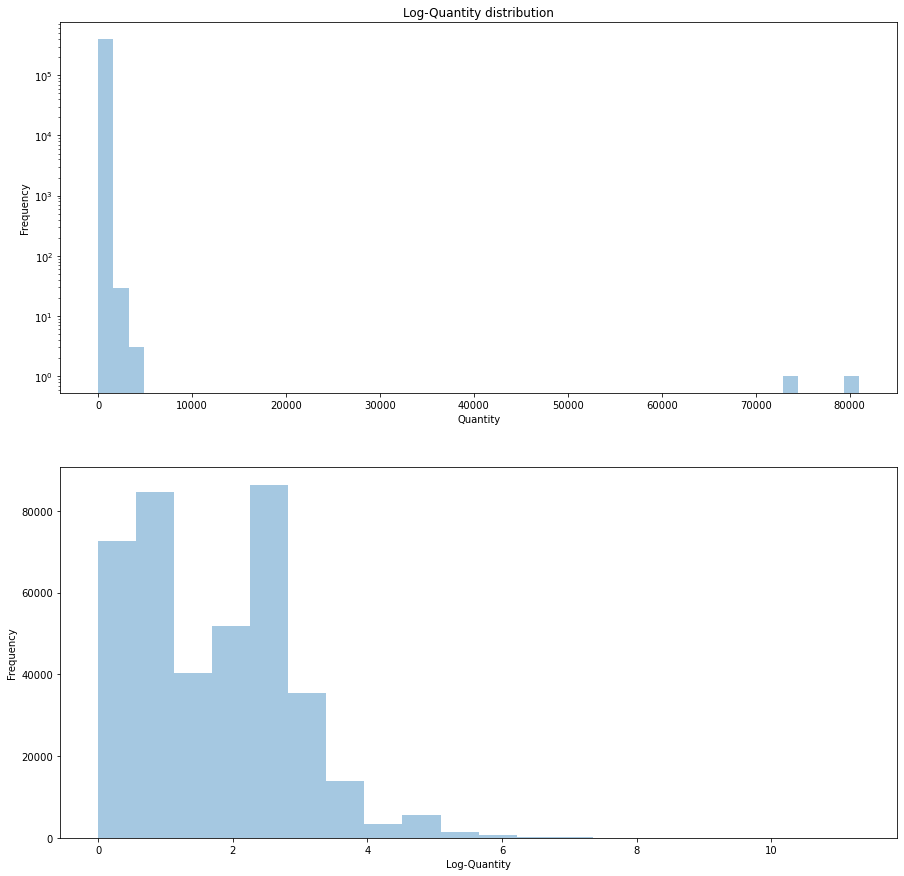

In [54]:
fig, ax = plt.subplots(2,1,figsize=(15,15))
sns.distplot(dat.Quantity, ax=ax[0], kde=False)
ax[0].set_title("Quantity distribution")
ax[0].set_ylabel('Frequency')
ax[0].set_yscale("log")
sns.distplot(np.log(dat.Quantity), ax=ax[1], bins=20, kde=False)
ax[0].set_title("Log-Quantity distribution")
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel("Log-Quantity");

From the graphs it looks like we have a small amount of outliers greater than 70000. lets take the exponent where Log-Quantity=4 as most of our distribution lies within this region

In [55]:
np.exp(4),np.quantile(dat.Quantity, 0.95)

(54.598150033144236, 36.0)

It looks like we will be able to keep more than 95% of our data with a max quantity set at 55. Lets take a look at our distribution after we drop the outliers.

In [56]:
dat = dat.loc[dat.Quantity < 55].copy()

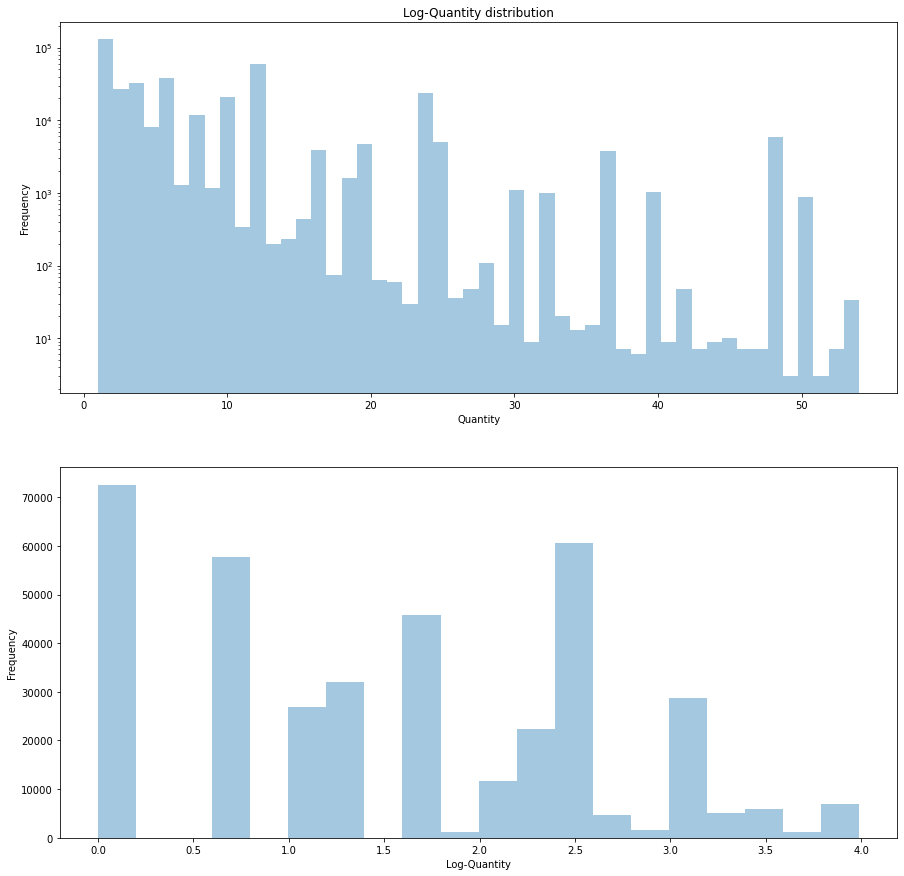

In [57]:
fig, ax = plt.subplots(2,1,figsize=(15,15))
sns.distplot(dat.Quantity, ax=ax[0], kde=False)
ax[0].set_title("Quantity distribution")
ax[0].set_ylabel('Frequency')
ax[0].set_yscale("log")
sns.distplot(np.log(dat.Quantity), ax=ax[1], bins=20, kde=False)
ax[0].set_title("Log-Quantity distribution")
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel("Log-Quantity");

In [58]:
dat.Quantity.describe()

count    385086.000000
mean          8.303200
std           9.298515
min           1.000000
25%           2.000000
50%           5.000000
75%          12.000000
max          54.000000
Name: Quantity, dtype: float64

We have a much better distribution now and a much smaller std. Now we can move on to our Time-Series Analysis.

### Which months had the highest Revenue?

Now I would like to explore what statistics and insights we can uncover with different time periods and dates in our data. I will start by creating new columns that represent different date ranges that we can use. I will also create a revenue column as that will be a good metric to look at to determine sales performance in different time ranges.

In [60]:
dat

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,12


In [59]:
dat["Revenue"] = dat.Quantity * dat.UnitPrice

dat["Month"] = dat.InvoiceDate.dt.month

dat.groupby('Month').sum().sort_values(by='Revenue', ascending=False)

,Quantity,UnitPrice,Revenue
Month,,,
11,470243,169976.20,880963.29
10,377513,135997.49,706560.60
9,356305,108005.34,657074.10
12,334419,119359.91,652108.14
5,236606,84162.85,482348.18
8,239155,71903.84,429074.45
3,214524,76997.62,419788.80
6,219117,77073.04,414362.30
7,232788,69543.50,409171.27


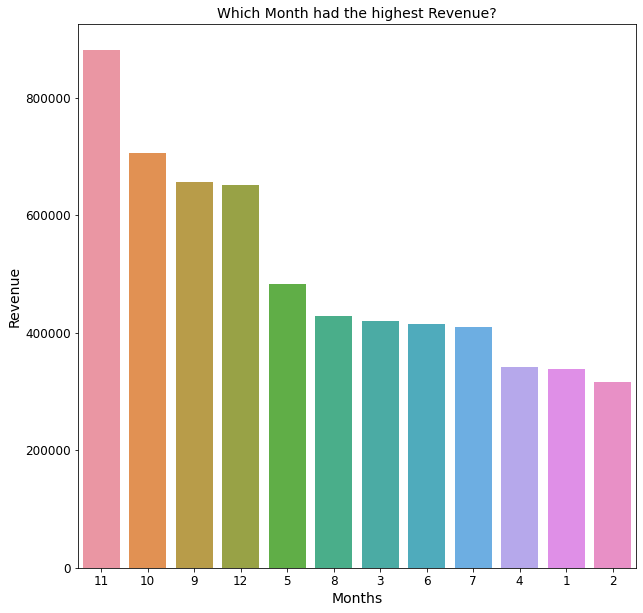

In [61]:
plt.rcParams.update({'font.size': 12})
z = dat.groupby('Month').sum().sort_values(by='Revenue',ascending=False)
x = z.index
y = z['Revenue'].sort_values(ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(x, y, order=x)
plt.ylabel("Revenue", Size=14)
plt.xlabel("Months", Size=14)
plt.title("Which Month had the highest Revenue?", Size=14);

We can see that November is the highest revenue month for the company followed by October and then September. This could be because these are the months leading up to the holiday months where it is more likely people will be buying gifts and business increasing their inventory. It should be noted that the company considers many of their customers to be wholesalers indicating that customers are likely preparing for the holiday season by purchasing more products.

### What product contributed the most to revenue? Why?

In [62]:

df = dat[['StockCode','Revenue']].groupby('StockCode').sum().sort_values(by='Revenue', ascending=False).iloc[0:9]
df

,Revenue
StockCode,
22423,111996.55
85123A,51928.21
47566,51068.83
POST,42213.27
84879,33697.22
85099B,30480.24
23298,30314.15
22086,27161.93
79321,26697.15


We can see that StockCode 22423 contributed the most to revenue by over $60000. Lets take a look at a sample of the transactions for StockCode 22423 to see if there are any clues that can explain why it's contribution to revenue is so high

In [63]:
dat[dat['StockCode'] == '22423'].sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Month
43628,540099,22423,REGENCY CAKESTAND 3 TIER,4,2011-01-04 16:41:00,12.75,15808,United Kingdom,51.00,1
380018,569724,22423,REGENCY CAKESTAND 3 TIER,40,2011-10-06 09:35:00,10.95,15061,United Kingdom,438.00,10
32379,539064,22423,REGENCY CAKESTAND 3 TIER,1,2010-12-15 16:50:00,12.75,17912,United Kingdom,12.75,12
270509,560569,22423,REGENCY CAKESTAND 3 TIER,1,2011-07-19 14:04:00,12.75,12480,Germany,12.75,7
192744,553472,22423,REGENCY CAKESTAND 3 TIER,8,2011-05-17 11:28:00,12.75,15093,United Kingdom,102.00,5
263030,559930,22423,REGENCY CAKESTAND 3 TIER,8,2011-07-14 09:22:00,12.75,17738,United Kingdom,102.00,7
128798,547360,22423,REGENCY CAKESTAND 3 TIER,16,2011-03-22 12:30:00,10.95,16135,United Kingdom,175.20,3
190307,553189,22423,REGENCY CAKESTAND 3 TIER,2,2011-05-15 13:14:00,12.75,15033,United Kingdom,25.50,5
371369,569219,22423,REGENCY CAKESTAND 3 TIER,1,2011-10-02 13:01:00,12.75,13558,United Kingdom,12.75,10
277246,561098,22423,REGENCY CAKESTAND 3 TIER,1,2011-07-25 10:56:00,12.75,14194,United Kingdom,12.75,7


The only clue to explain it's high contribution to revenue would be the relatively high UnitPrice compared to the rest of the products. This allows it to generate more revenue in lower quantities being sold. The other data features seem to be relatively random and so without further information we can make any more inferences.

Let me know of any suggestions and critiques you have in the comments below!
Cheers!